In [4]:
import pandas as pd 
import numpy as np

In [24]:
df = pd.read_csv('AB_NYC_2019.csv', delimiter = ',')

In [25]:
df.describe() # aqui podemos ver as estatísticas gerais da base de dados.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [26]:
df.info() # aqui podemos ver a quantidade de itens não nulos de cada coluna, já nos levando
          # a pensar que lá na frente teremos que resolver esses problema de nulos. 
          # podemos ver que temos nomes tanto de host como de apartamentos nulos, e tambem 
          # ultimos reviews, e reviews por mes tem um número alto de valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [27]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [28]:
df = df.rename(columns={'id': 'airbnb_id'})
# tava confuso na hora da leitura pq dizia só id no nome da coluna, quando na verdade é o ID do apartamento.

In [29]:
len(df['airbnb_id'].unique()) # quantos apartamentos estão listados para aluguel

48895

In [30]:
len(df['host_id'].unique()) # quantos hosts estão pondo seus apartamentos para aluguel

37457

In [31]:
df.shape

(48895, 16)

In [32]:
def get_listings(group):
    return group['airbnb_id'].tolist()

listings_by_host = df.groupby('host_id').apply(get_listings)
listings_by_host # quais apartamentos pertencem a quem

host_id
2438                                                [23669201]
2571                                                 [1101224]
2787         [2539, 7937553, 10160215, 10267242, 10593675, ...
2845                                          [2595, 18393354]
2868                                                [13234457]
                                   ...                        
274273284                                           [36478343]
274298453                                           [36481615]
274307600                                           [36482783]
274311461                                           [36483010]
274321313                                           [36484087]
Length: 37457, dtype: object

In [33]:
# como claramente tem mais apartamento do que dono, quero saber quantos apartamentos cada hoster tem.
count_by_host = df.groupby('host_id')['airbnb_id'].count().sort_values(ascending=False)
count_by_host

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
13540183       1
13538150       1
13535952       1
13533446       1
274321313      1
Name: airbnb_id, Length: 37457, dtype: int64

In [34]:
# verificar se há valores nulos
if df['host_id'].isnull().any():
    print('A coluna de host_id tem valores faltantes')
else:
    print('A coluna de host_id não tem valores faltantes')

if df['airbnb_id'].isnull().any():
    print('A coluna de airbnb_id tem valores faltantes')
else:
    print('A coluna de airbnb_id não tem valores faltantes')

A coluna de host_id não tem valores faltantes
A coluna de airbnb_id não tem valores faltantes


Agora veremos o preço

In [35]:
df['price'].unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [36]:
# verificar se há valores nulos
if df['price'].isnull().any().any():
    print('A coluna price não tem valores faltantes.')
else:
    print('A coluna price não tem valores faltantes.')

A coluna price não tem valores faltantes.


Verificamos já se temos valores de NaN ou None na coluna preços, e não tem. Mas por outro lado, na análise de valores únicos vimos que tem valores 0, o que significaria aluguel grátis? Muito provavelmente é um erro, e se não for, será tratado como NaN ou None da mesma forma. 

In [37]:
# como a quantidade de linhas dessa tabela é a quantidade de apartamentos em aluguel, fica fácil fazer média.
df['price'].mean()

152.7206871868289

In [38]:
# mudando os valores 0 pela média 
df['price'] = df['price'].replace(0, df['price'].mean())

# se tivessemos valoras igual a None/Nan poderiamos usar uma função própria pra isso, que é fillna
df['price'] = df['price'].fillna(df['price'].mean())

Mas antes de entrar a fundo nos preços, vale a pena fazer uma análise encima de toda New York? Não seria mas inteligente ver as vizinhanças e analisar melhor preço por cada região? Não estou falando de análise de latitude e longitude, e sim da coluna neighbourhood.

In [39]:
len(df['neighbourhood'].unique())

221

In [40]:
len(df['neighbourhood_group'].unique())

5

Para uma análise mais específica, faremos uma abordagem de cada vizinhança. Para uma mais abrangente, pegaremos os grupos de vizinhança.

In [41]:
# vamos usar o groupby para organizar nossas vizinhanças e pegar todas ocorrencias de preço delas na tabela
# original e tirar a média.
vizinhanca = df.groupby('neighbourhood_group')['price'].mean()
vizinhanca

neighbourhood_group
Bronx             87.636774
Brooklyn         124.451576
Manhattan        196.882864
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

Vou focar em achar outlier dos preços.

In [42]:
# Primeiro usaremos a técnica de verificar fora do interquartil
# ( eu ia usar a tecnica do slide de fazer na mão a conta do percentil, mas óbvio que o pandas já tem )

quartis = df.groupby('neighbourhood_group')['price'].quantile([0.25, 0.75]).unstack() 
quartis.columns = ['Q1','Q3'] 

print(quartis)

                       Q1     Q3
neighbourhood_group             
Bronx                45.0   99.0
Brooklyn             60.0  150.0
Manhattan            95.0  220.0
Queens               50.0  110.0
Staten Island        50.0  110.0


In [43]:
# calculando os quartis de cada grupo de vizinhança
quartis_por_vizinhanca = df.groupby('neighbourhood_group')['price'].apply(lambda x: x.quantile([0.25, 0.75])).unstack()

# calculando os limites inferior e superior para cada grupo de vizinhança
lim_inferior_por_vizinhanca = quartis_por_vizinhanca[0.25] - 1.5 * (quartis_por_vizinhanca[0.75] - quartis_por_vizinhanca[0.25])
lim_superior_por_vizinhanca = quartis_por_vizinhanca[0.75] + 1.5 * (quartis_por_vizinhanca[0.75] - quartis_por_vizinhanca[0.25])

# detectando os outliers para cada grupo de vizinhança
outliers_por_vizinhanca = pd.DataFrame()
for vizinhanca in df['neighbourhood_group'].unique():
    grupo = df[df['neighbourhood_group'] == vizinhanca] # cria um dataframe de grupo que vai tratar de uma vizinhanca por vez.
    
    #salva os lim inferiores e superiores
    lim_inferior = lim_inferior_por_vizinhanca[vizinhanca] 
    lim_superior = lim_superior_por_vizinhanca[vizinhanca]

    outliers = grupo[(grupo['price'] < lim_inferior) | (grupo['price'] > lim_superior)]
    outliers_por_vizinhanca = pd.concat([outliers_por_vizinhanca, outliers])

outliers_por_vizinhanca

,airbnb_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299.0,3,9,2011-12-28,0.07,1,0
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800.0,1,25,2016-08-04,0.24,1,7
116,26969,2 story family home in Williamsburg,115307,Alexandra,Brooklyn,Williamsburg,40.71942,-73.95748,Entire home/apt,325.0,3,324,2019-06-23,3.01,1,107
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400.0,2,16,2018-12-30,0.24,2,216
158,38663,Luxury Brownstone in Boerum Hill,165789,Sarah,Brooklyn,Boerum Hill,40.68559,-73.98094,Entire home/apt,475.0,3,23,2018-12-31,0.27,1,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47661,35856471,GRAND OPENING 3 levels tons of sunlights 25%off,269707834,Angel,Bronx,Wakefield,40.89198,-73.84779,Entire home/apt,309.0,2,0,NaN,NaN,1,168
48102,36080023,The Game Room,188453457,Denise,Bronx,Claremont Village,40.84218,-73.90969,Entire home/apt,390.0,2,0,NaN,NaN,2,348
48282,36177241,VJ'S 5 HOUR YACHT TOUR,23732730,Buddy,Bronx,City Island,40.84443,-73.78497,Entire home/apt,1000.0,1,0,NaN,NaN,4,90
48310,36199090,ROMANTIC SUNSET YACHT CRUISE & FIREWORKS,23732730,Buddy,Bronx,City Island,40.84295,-73.78433,Entire home/apt,600.0,1,0,NaN,NaN,4,44


E se quisessemos uma análise mais específica da região, usariamos a coluna de vizinhanca, não grupo de vizinhanca. Mas essa foi a abordagem de ataque ao problema, usando os interquartis.
Agora vou usar zscore:

In [44]:
from scipy.stats import zscore

df['zscore'] = df.groupby('neighbourhood_group')['price'].apply(lambda x: zscore(x))

# selecionando as linhas com z-score acima do limite ( escolhi 3 desvios padrões)
limite_zscore = 3
outliers = df[df['zscore'].abs() > limite_zscore]

outliers

<ipython-input-44-ac14da67820f>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['zscore'] = df.groupby('neighbourhood_group')['price'].apply(lambda x: zscore(x))


,airbnb_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zscore
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800.0,1,25,2016-08-04,0.24,1,7,3.615433
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000.0,30,30,2018-05-05,0.33,11,0,6.188335
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300.0,5,28,2018-09-25,0.31,4,297,3.785921
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800.0,4,122,2019-07-02,1.37,1,257,3.615433
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000.0,7,0,NaN,NaN,1,365,9.620356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999.0,30,0,NaN,NaN,1,270,6.184903
48310,36199090,ROMANTIC SUNSET YACHT CRUISE & FIREWORKS,23732730,Buddy,Bronx,City Island,40.84295,-73.78433,Entire home/apt,600.0,1,0,NaN,NaN,4,44,4.804348
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369.0,1,0,NaN,NaN,1,349,6.660635
48535,36311055,"Stunning & Stylish Brooklyn Luxury, near Train",245712163,Urvashi,Brooklyn,Bedford-Stuyvesant,40.68245,-73.93417,Entire home/apt,1749.0,1,0,NaN,NaN,1,303,8.694338


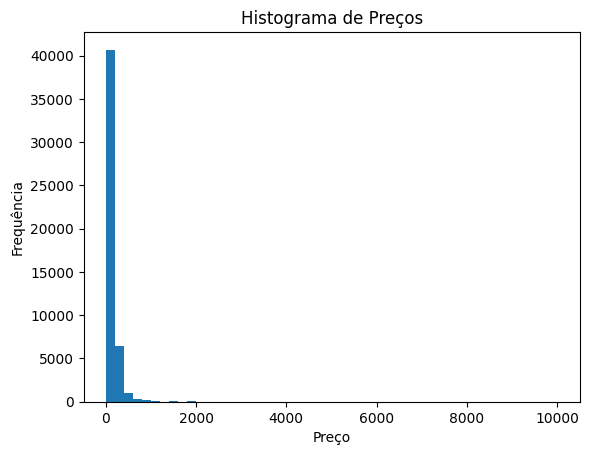

In [45]:
import matplotlib.pyplot as plt

# exemplo de histograma para o atributo "price"
plt.hist(df['price'], bins=50)
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Histograma de Preços')
plt.show()

Esse histograma nos mostra algo que já sabiamos, temos valores altos, como 1000, 2000 mas a maior concentração é entre alugueis de 150 dolares. 
Para montar um histograma, a receita de bolo é essa, passa a coluna do dataframe referente ao atributo que você quer mostrar, ponha legenda se quiser usando as funções de label e um título para já dizer para quem está visualizando o dado, de que se trata o histograma.

E agora, só faltando a normalização e padronização.

In [49]:
#to do usar min max do slide 41